In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("HDFC.csv")

df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,2680.0,2762.0,2666.75,2751.199951,2726.300781,5939812
1,2021-01-12,2738.0,2760.0,2719.00,2747.550049,2722.683838,3412213


In [2]:
print("We have {} records and {}  features in the dataset".format(df.shape[0],df.shape[1]))

We have 122 records and 7  features in the dataset


In [3]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       122 non-null    object 
 1   Open       122 non-null    float64
 2   High       122 non-null    float64
 3   Low        122 non-null    float64
 4   Close      122 non-null    float64
 5   Adj Close  122 non-null    float64
 6   Volume     122 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.8+ KB


In [6]:
df["Date"]=pd.to_datetime(df["Date"])


In [7]:
df.drop(columns=["Date"]).describe()


,Open,High,Low,Close,Adj Close,Volume
count,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,2564.011483,2591.813939,2527.490581,2557.907375,2540.192069,3.675067e+06
std,104.247923,104.464127,100.272646,102.539407,100.409931,1.751197e+06
min,2365.000000,2403.000000,2354.000000,2377.199951,2355.685547,1.234739e+06
25%,2494.362426,2519.949951,2457.424926,2495.312439,2481.684936,2.608766e+06
50%,2544.224976,2562.049926,2506.699951,2532.300049,2516.408691,3.227516e+06
75%,2613.775024,2644.399902,2573.250000,2597.212524,2582.328064,4.253986e+06
max,2871.000000,2896.000000,2838.000000,2860.449951,2834.562012,1.411979e+07


In [8]:
print(df["Date"].dt.year.unique())
print("------------------\n")
print(df["Date"].dt.month.unique())
print("-----------------")


[2021]
------------------

[1 2 3 4 5 6 7]
-----------------


<span style="color:blue">Interpretation:This Dataset completely for 2021 hdfc stock data but having data from jan to july </span>

Text(0, 0.5, 'price')

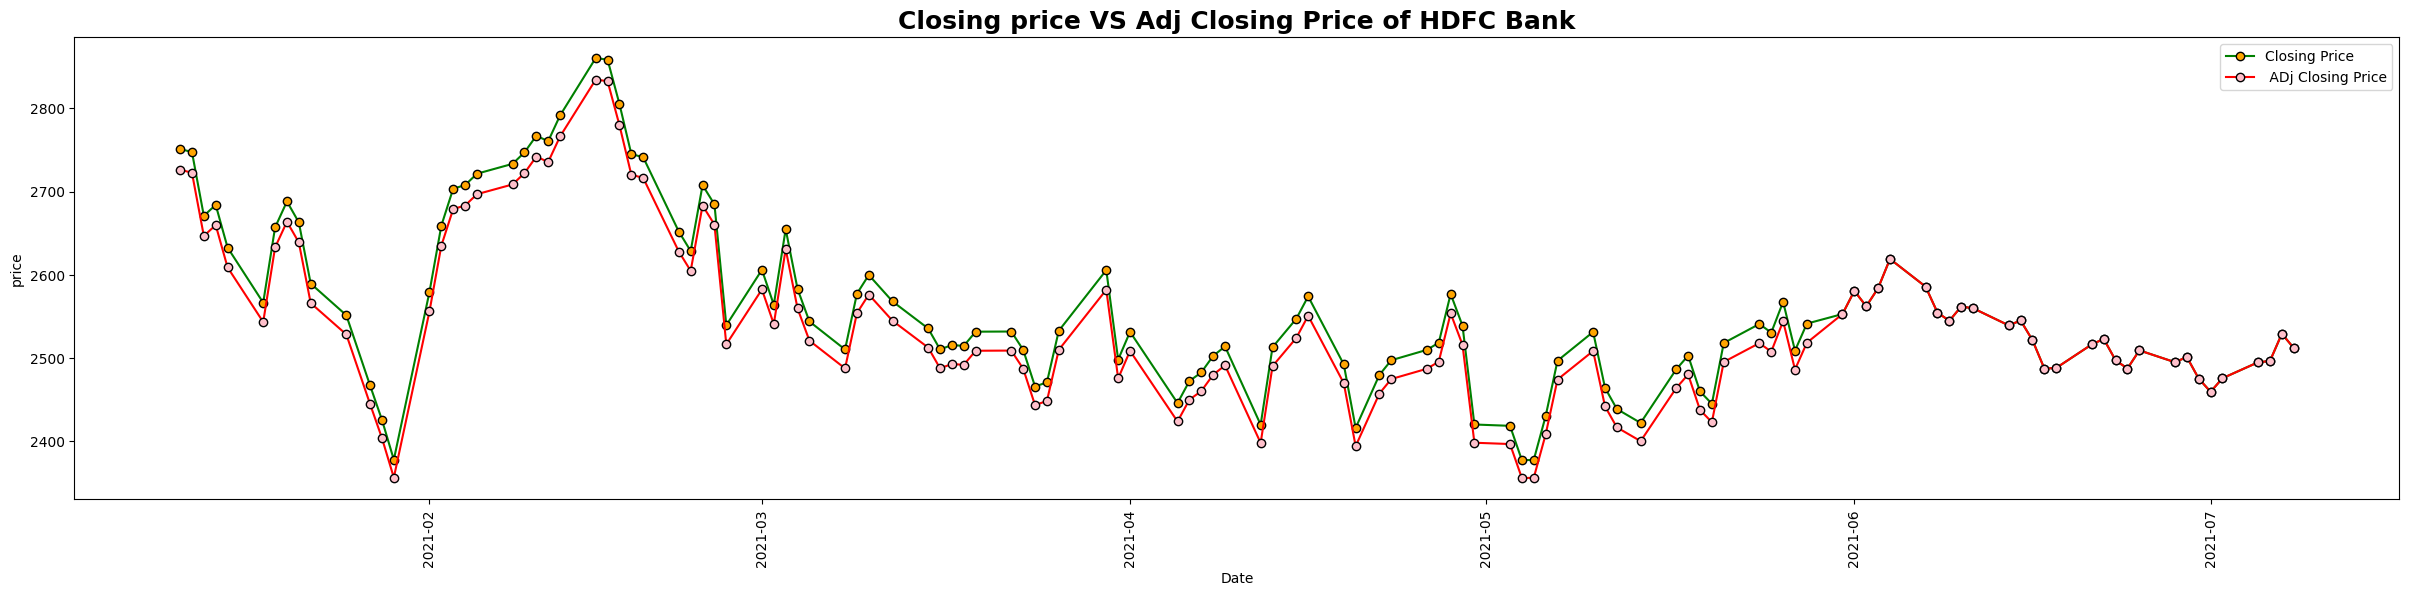

In [9]:
plt.figure(figsize=(30,6))
plt.plot(df["Date"],df["Close"],color="g",marker="o",markerfacecolor="orange", 
         markeredgecolor="black",label="Closing Price")
plt.plot(df["Date"],df["Adj Close"],color="r",marker="o",markerfacecolor="pink", 
         markeredgecolor="black",label=" ADj Closing Price")
plt.xticks(rotation=90)
plt.legend()
plt.title("Closing price VS Adj Closing Price of HDFC Bank",fontweight="bold",fontsize=18)
plt.xlabel("Date")
plt.ylabel("price")


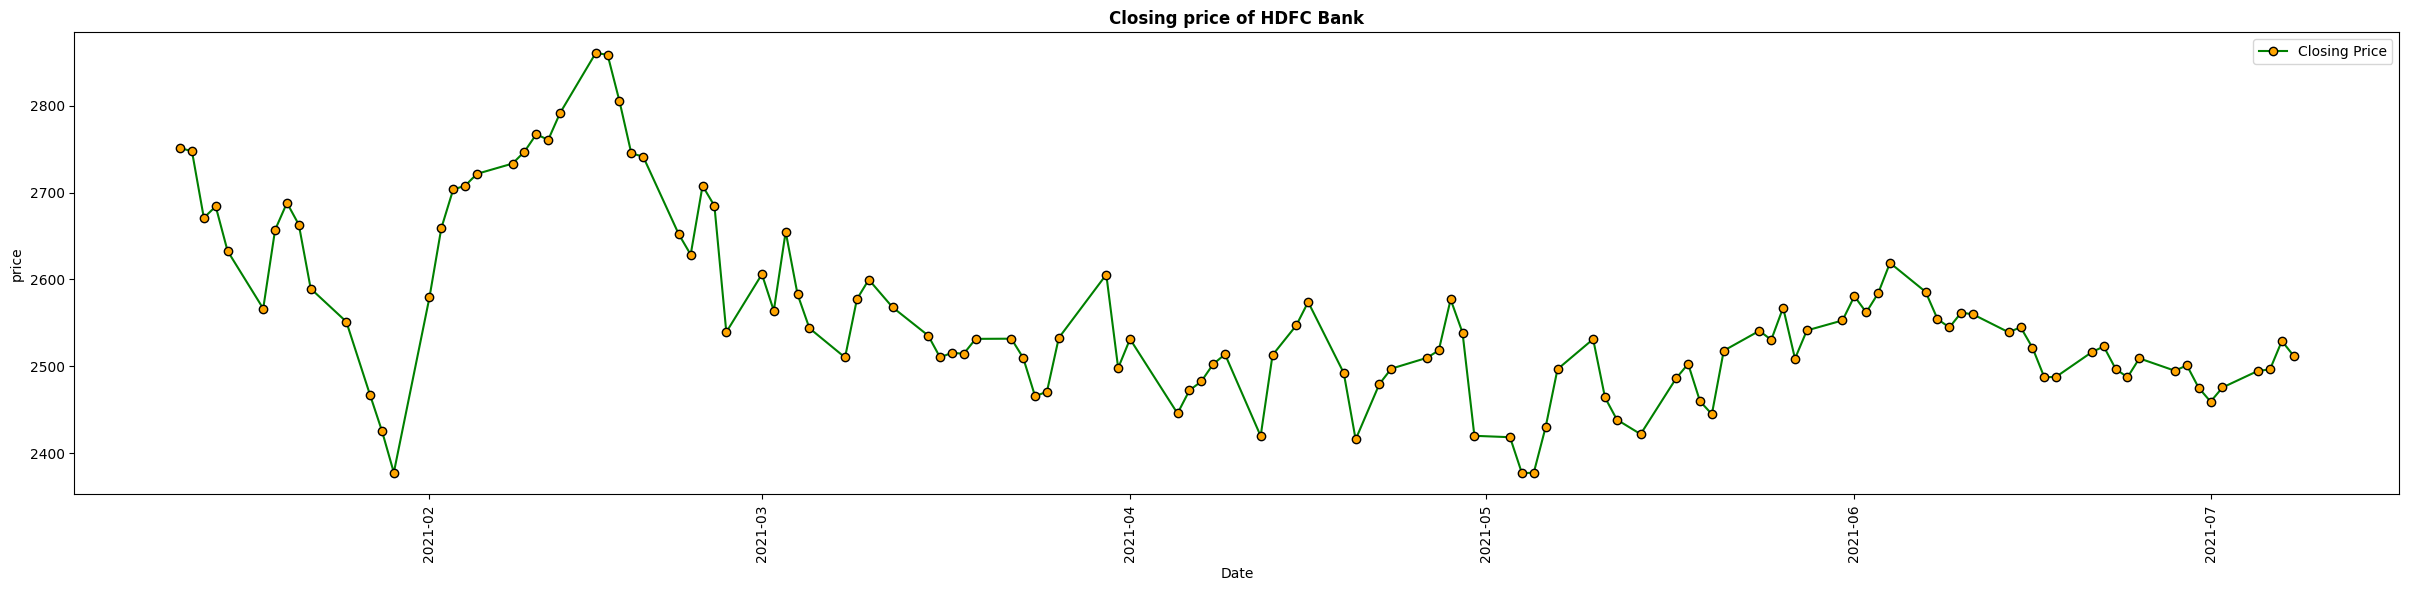

In [10]:
plt.figure(figsize=(30,6))
plt.plot(df["Date"],df["Close"],color="g",marker="o",markerfacecolor="orange", 
         markeredgecolor="black",label="Closing Price")
plt.xticks(rotation=90)
plt.legend()
plt.title("Closing price of HDFC Bank",fontweight="bold")
plt.xlabel("Date")
plt.ylabel("price")
plt.show()

Text(0.5, 1.0, 'Outliers Identification')

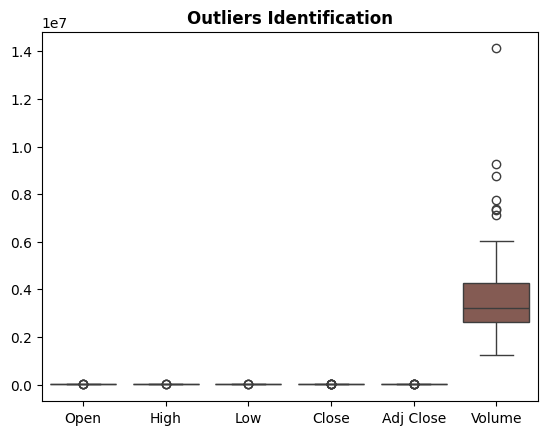

In [11]:
#Outliers check
sns.boxplot(df)
plt.title("Outliers Identification",fontweight="bold")

###In General there is a chance we can have outliers in the Volume feature.Volume is totally depends upon demand and supply

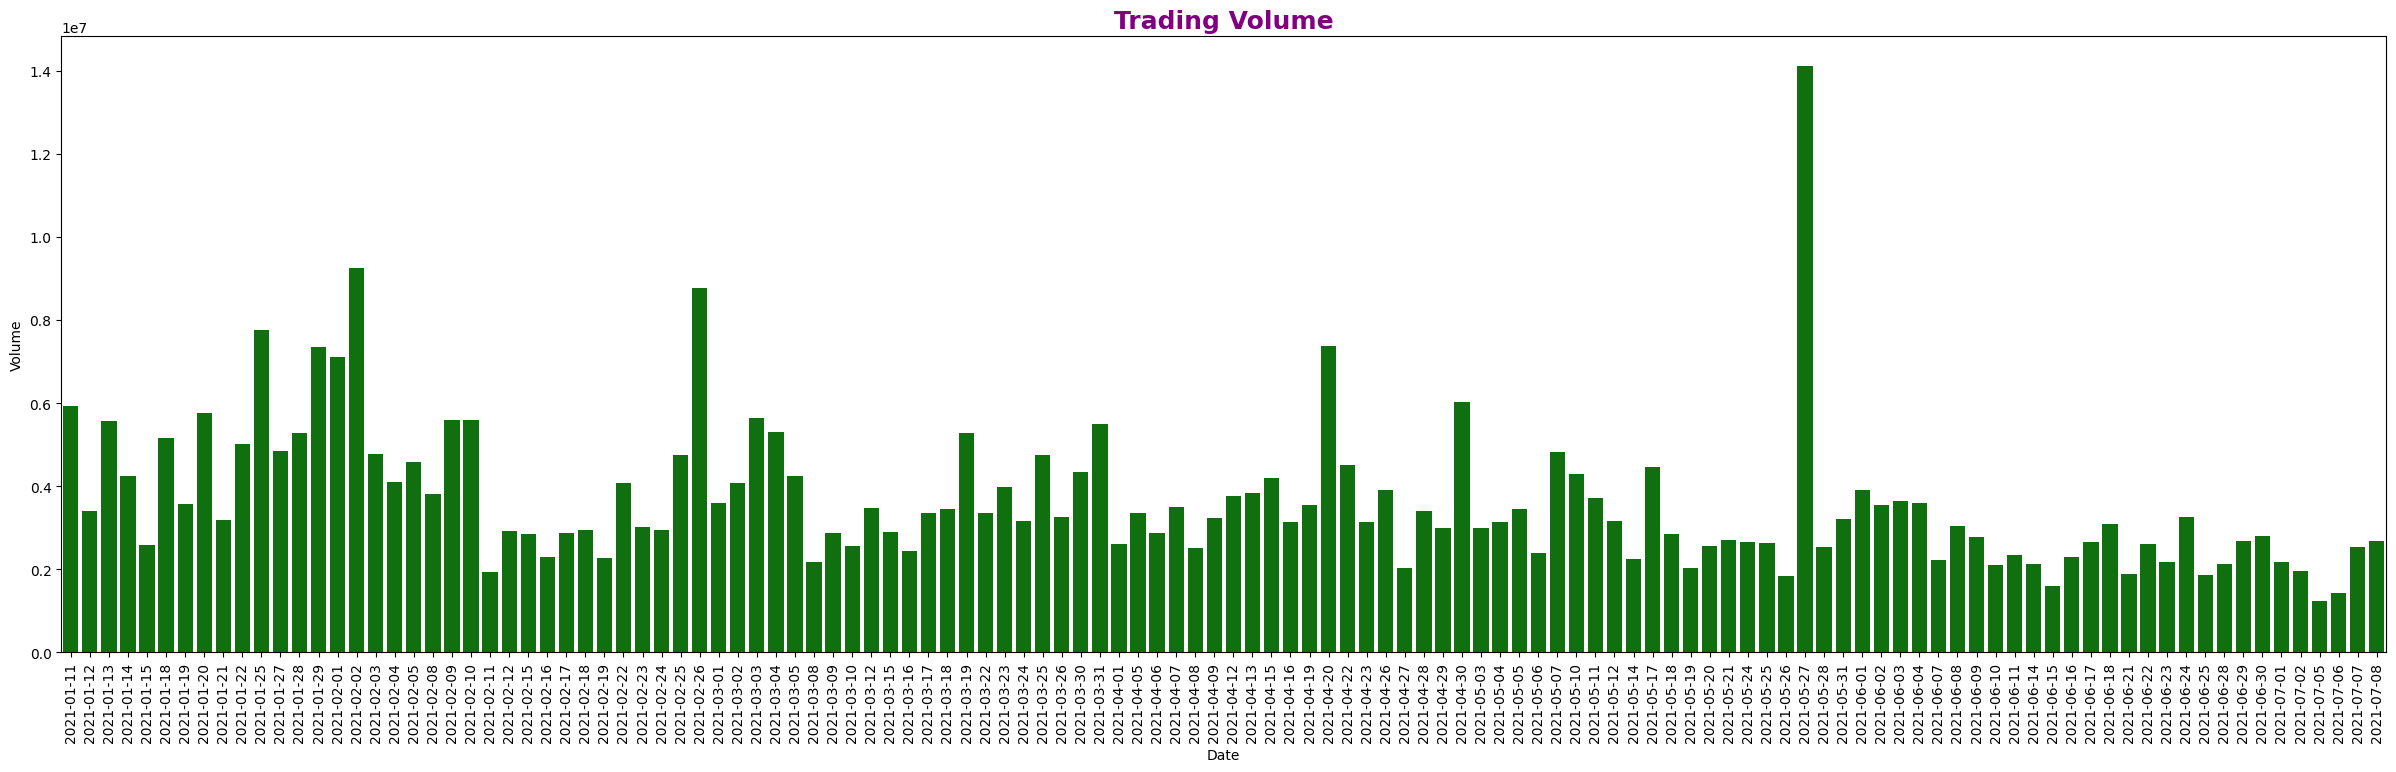

In [12]:
plt.figure(figsize=(30,8))
sns.barplot(x=df["Date"],y=df["Volume"],data=df,color="green")
plt.xticks(rotation=90)
plt.title("Trading Volume",fontweight="bold",fontsize=18,color="purple")
plt.show()

In [13]:
avg_volume=df["Volume"].median()
print(avg_volume)

3227516.0


In [14]:
corr=df.drop(["Date"],axis=1).corr()
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.956334,0.957356,0.900605,0.895084,0.130127
High,0.956334,1.000000,0.957710,0.963233,0.952285,0.185876
Low,0.957356,0.957710,1.000000,0.965053,0.966178,0.005613
Close,0.900605,0.963233,0.965053,1.000000,0.995389,0.052240
Adj Close,0.895084,0.952285,0.966178,0.995389,1.000000,0.017582
Volume,0.130127,0.185876,0.005613,0.052240,0.017582,1.000000


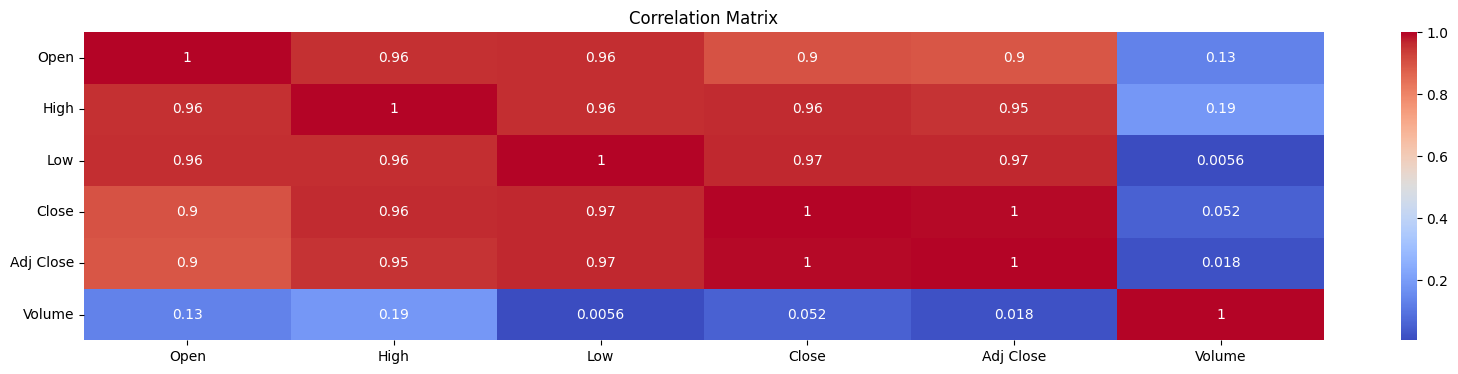

In [15]:
plt.figure(figsize=(20,4))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

*Observation:Otherthan Volume remaining features are highly correlated with each other*

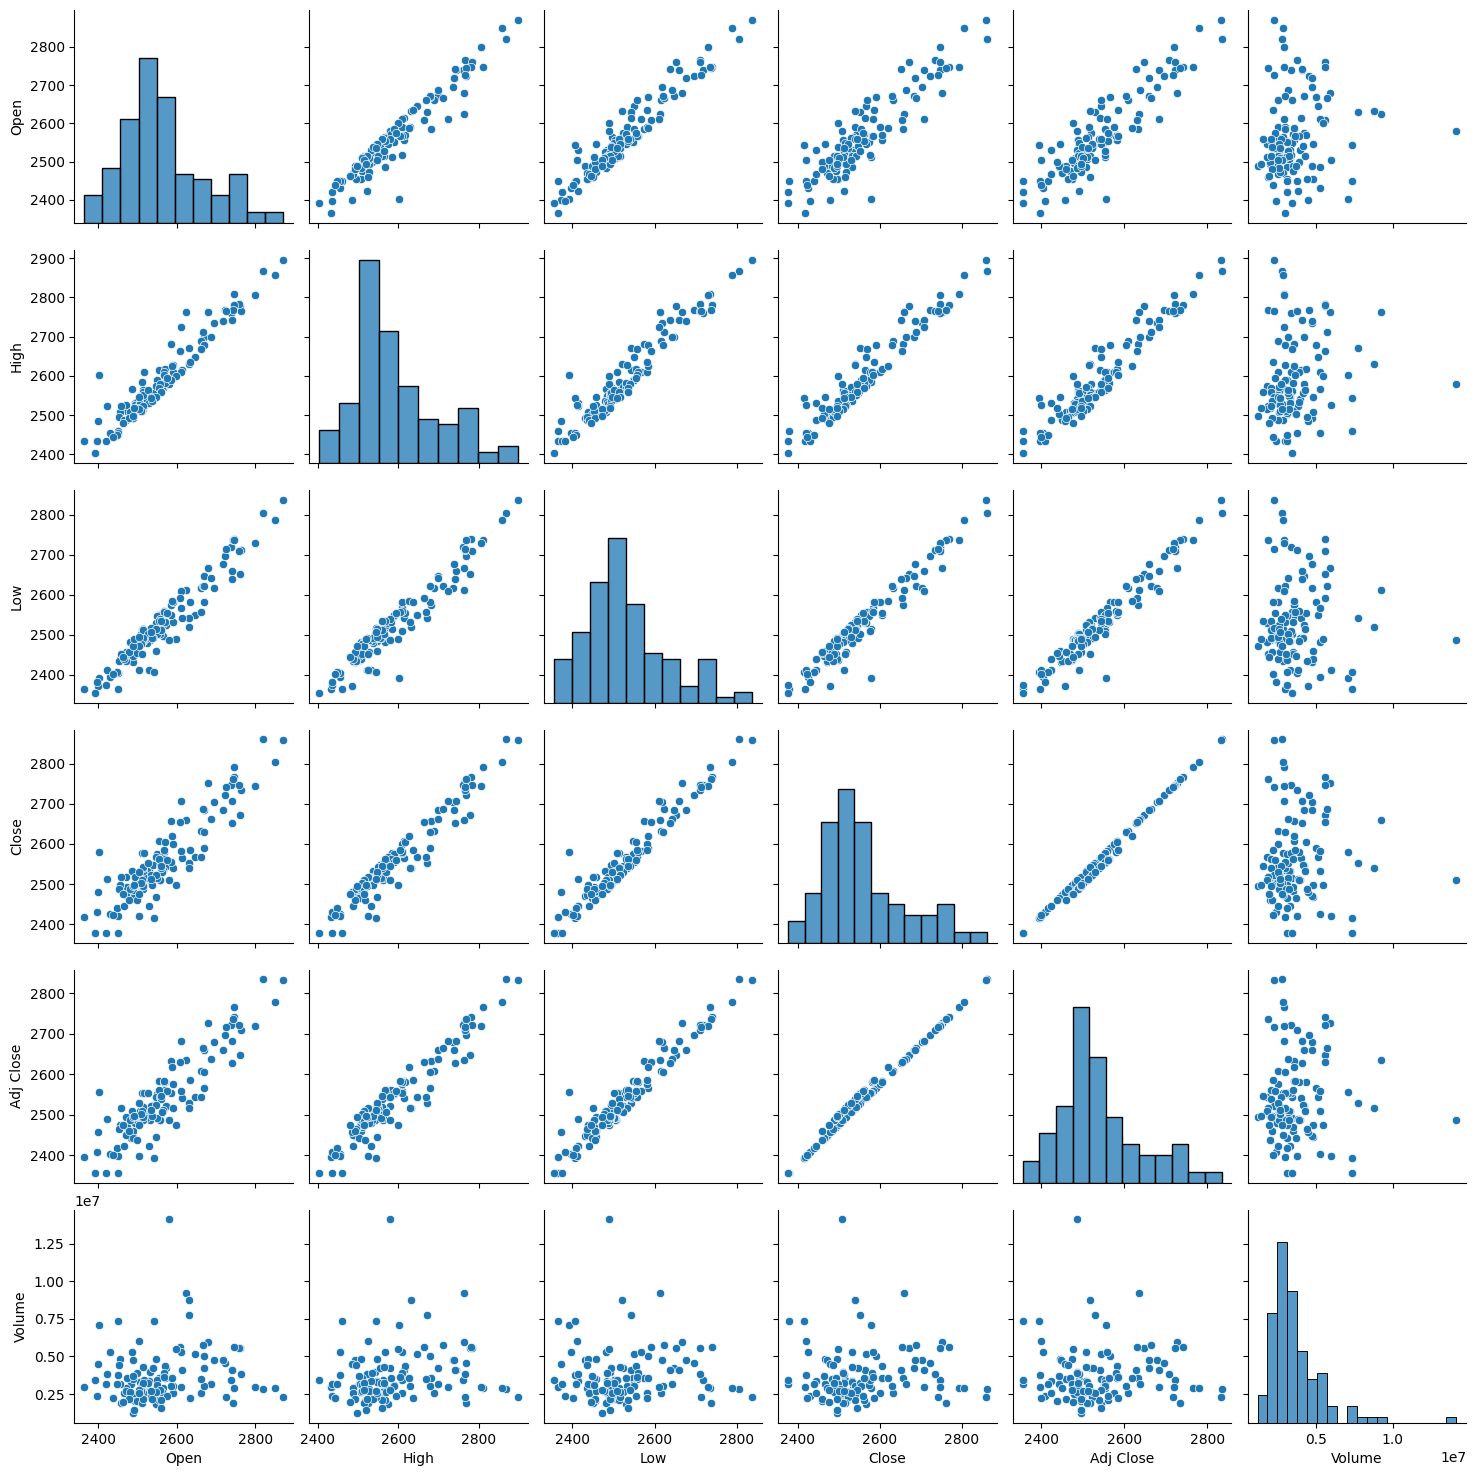

In [16]:
sns.pairplot(df)
plt.show()

The above Pairplot Diagram clearly indicates that the high linear relationship between other feature.Linear models works well in this dataset.

In [17]:

df["result"]=df["Adj Close"].shift(-1)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,result
117,2021-07-02,2463.000000,2480.000000,2445.000000,2475.699951,2475.699951,1951251,2494.899902
118,2021-07-05,2489.300049,2496.800049,2471.199951,2494.899902,2494.899902,1234739,2496.399902
119,2021-07-06,2492.600098,2518.899902,2490.199951,2496.399902,2496.399902,1428812,2529.199951
120,2021-07-07,2503.850098,2545.800049,2495.199951,2529.199951,2529.199951,2542003,2512.050049
121,2021-07-08,2535.000000,2543.850098,2508.000000,2512.050049,2512.050049,2683729,NaN


In [18]:
df.dropna(subset="result",inplace=True)


In [19]:
df.drop(["Date","Close","Adj Close"],axis=1,inplace=True)

In [20]:
df.to_csv("Cleaned_HDFC_stock.csv",index=False)